# Importações e configurações

In [733]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

from tpot import TPOTClassifier

import matplotlib.pyplot as plt

import xgboost as xgb

from joblib import dump

import warnings

In [734]:
warnings.filterwarnings('ignore')

In [735]:
RANDOM_SEED = 42

# Carregando os dados

In [736]:
df = pd.read_excel("../data/cleaned_data/cleaned_data.xlsx")

In [737]:
df

,Alimentação no ambiente escolar,Aluno contemplado com bolsa?,Como você acessa os serviços de saúde_Plano de saúde (Privado),Como você acessa os serviços de saúde_Público e privado,Como você acessa os serviços de saúde_Sistema Público de Saúde,Como você acessa/acessou à educação básica (Ensino Médio)_Bolsista de escola privada,Como você acessa/acessou à educação básica (Ensino Médio)_Escola privada,Como você acessa/acessou à educação básica (Ensino Médio)_Escola pública,Como você acessa/acessou à educação básica (Ensino Médio)_Pública e privada,Como você acessou à educação básica (Ensino Fundamental)_Bolsista de escola privada,...,Sexo_Feminino,Sexo_Masculino,Turno_Integral,Turno_Manhã,Turno_Noite,Turno_Tarde,Você possui filhos entre 0 e 6 anos,Você possui filhos maiores que 6 anos,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?"
0,25.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,0,0,False,False
1,0.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,0,0,True,True
2,0.0,False,False,False,True,False,False,True,False,False,...,True,False,True,False,False,False,0,3,False,False
3,70.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,0,0,False,False
4,0.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,False,True,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19131,45.0,True,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,0,0,False,False
19132,0.0,True,False,False,True,False,False,True,False,False,...,True,False,False,False,False,True,0,0,False,True
19133,10.0,True,False,False,True,False,False,True,False,False,...,True,False,False,False,True,False,0,2,True,True
19134,40.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,0,0,True,True


# Pré-processamento dos dados

## Dropando a coluna Relatos de vida (TEMPORÁRIO)

In [738]:
df = df.drop(columns=["Relato de vida"])

## Transformando float64 em float

In [739]:
df.dtypes

Alimentação no ambiente escolar                                      float64
Aluno contemplado com bolsa?                                            bool
Como você acessa os serviços de saúde_Plano de saúde (Privado)          bool
Como você acessa os serviços de saúde_Público e privado                 bool
Como você acessa os serviços de saúde_Sistema Público de Saúde          bool
                                                                      ...   
Turno_Tarde                                                             bool
Você possui filhos entre 0 e 6 anos                                    int64
Você possui filhos maiores que 6 anos                                  int64
Você é chefe de família ou responsável pela própria subsistência?       bool
É cotista por renda inferior a 1,5 salário mínimo?                      bool
Length: 71, dtype: object

## Dividindo dados nos conjuntos de treino, validação e teste

In [740]:
labels = df[['Aluno contemplado com bolsa?']].copy()
df = df.drop(columns=['Aluno contemplado com bolsa?'])

In [741]:
labels

,Aluno contemplado com bolsa?
0,True
1,True
2,False
3,True
4,True
...,...
19131,True
19132,True
19133,True
19134,True


In [742]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.1)#, random_state=RANDOM_SEED)

## Normalizando os dados numéricos

In [743]:
#numeric_columns = df.select_dtypes(include=['number']).columns

X_train_unormalized = X_train

scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Inteligências artificiais

## Funções de métricas

In [744]:
def get_overall_metrics(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  acc = (tp+tn)/(tp+tn+fp+fn)
  tpr = tp/(tp+fn)
  fpr = fp/(fp+tn)
  precision = tp/(tp+fp)
  f1 = (2*tpr*precision)/(tpr+precision)
  return {'acc':acc,'tpr':tpr,'fpr':fpr,'precision':precision,'f1-score':f1}

In [745]:
def transform_prob_in_pred(probs):
    predict_list = list()
    for prob in probs:
        if prob[0] > prob[1]:
            predict_list.append(False)
        elif prob[0] < prob[1]:
            predict_list.append(True)

    predict_array = np.array(predict_list)
    return predict_array

## Modelos de aprendizagem de máquina clássicos

### Naive bayesian

#### Treinamento

In [746]:
model = GaussianNB()

In [747]:
model.fit(X_train, y_train)

GaussianNB()

#### Teste

In [748]:
y_pred_proba = model.predict_proba(X_test)

In [749]:
y_pred = model.predict(X_test)

In [750]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [751]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.19644723092998956
Precision: 0.7546577291624981
Recall: 0.19644723092998956


In [752]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.19644723092998956,
 'tpr': 0.01918158567774936,
 'fpr': 0.011428571428571429,
 'precision': 0.8823529411764706,
 'f1-score': 0.03754693366708385}

### Logistic regression

#### Treinamento

In [753]:
model = LogisticRegression()

In [754]:
model.fit(X_train, y_train)

LogisticRegression()

#### Teste

In [755]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [756]:
y_pred_proba = model.predict_proba(X_test)

In [757]:
y_pred = model.predict(X_test)

In [758]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8187042842215256
Precision: 0.7721614407748246
Recall: 0.8187042842215256


In [759]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8187042842215256,
 'tpr': 0.9878516624040921,
 'fpr': 0.9371428571428572,
 'precision': 0.8248798718633209,
 'f1-score': 0.8990398603433227}

### Random Forest

#### Treinamento

In [760]:
model = RandomForestClassifier(n_estimators=100)#, random_state=RANDOM_SEED)

In [761]:
model.fit(X_train, y_train)

RandomForestClassifier()

#### Teste

In [762]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [763]:
y_pred_proba = model.predict_proba(X_test)

In [764]:
y_pred = model.predict(X_test)

In [765]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8119122257053292
Precision: 0.7605569778717248
Recall: 0.8119122257053292


In [766]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8119122257053292,
 'tpr': 0.9667519181585678,
 'fpr': 0.88,
 'precision': 0.8307692307692308,
 'f1-score': 0.8936170212765958}

### Gradient Boost Machine

#### Treinamento

In [767]:
model = GradientBoostingClassifier(
    n_estimators= 50,
    learning_rate= 0.09,
    max_depth= 4,
    min_samples_split= 2,
    min_samples_leaf= 1,
    subsample= 0.5
    )#, random_state=RANDOM_SEED)

In [768]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.09, max_depth=4, n_estimators=50,
                           subsample=0.5)

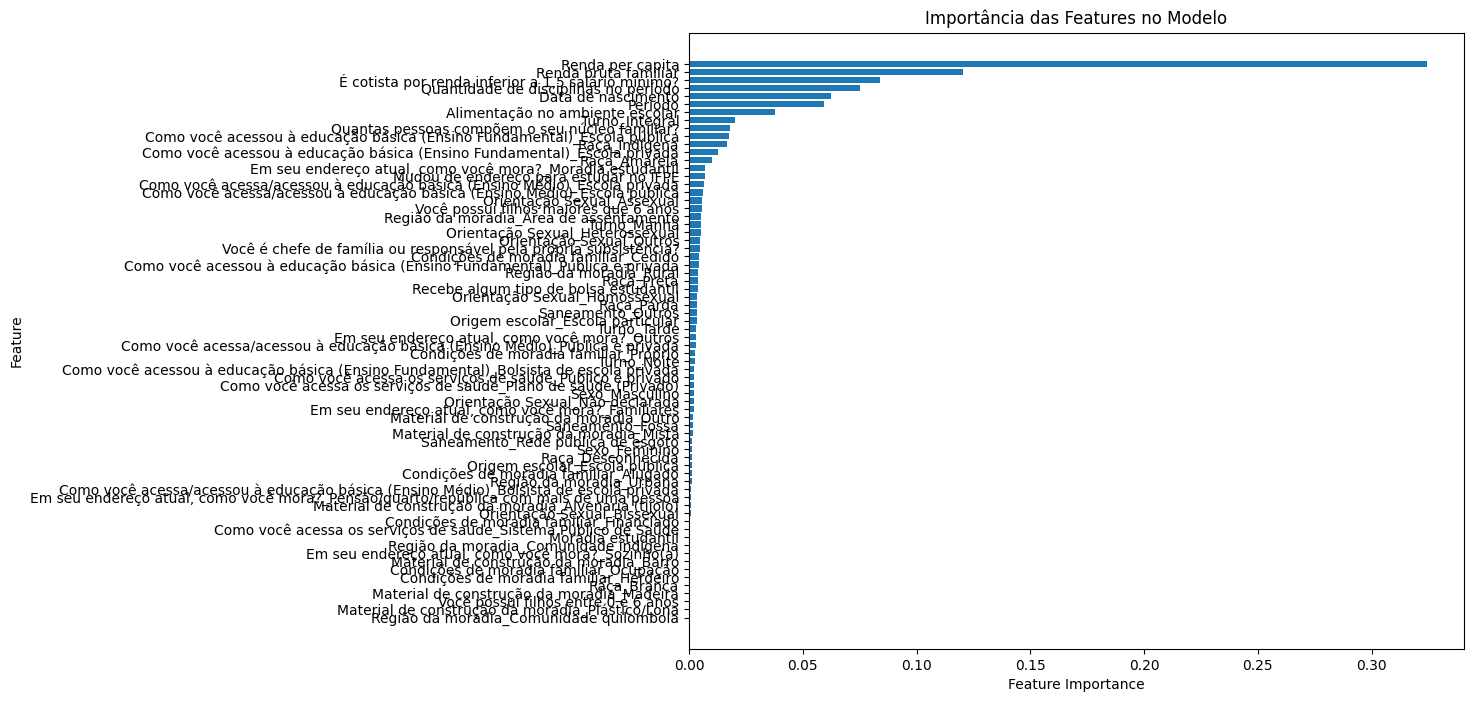

In [769]:
importance = model.feature_importances_

# Converter em DataFrame para facilitar a visualização
importance_df = pd.DataFrame({
    'Feature': X_train_unormalized.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo")
plt.gca().invert_yaxis()  # Inverter a ordem para que a feature mais importante apareça no topo
plt.show()

#### Teste

In [770]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [771]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.31678691, 0.68321309],
       [0.12733225, 0.87266775],
       [0.12297282, 0.87702718],
       ...,
       [0.07159203, 0.92840797],
       [0.19086524, 0.80913476],
       [0.31797117, 0.68202883]])

In [772]:
y_pred = model.predict(X_test)

In [773]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8239289446185998
Precision: 0.7992069024347238
Recall: 0.8239289446185998


In [774]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8239289446185998,
 'tpr': 0.9923273657289002,
 'fpr': 0.9285714285714286,
 'precision': 0.8268513585508791,
 'f1-score': 0.902063353676257}

### Cross Batch Model (XBM)

#### Treinamento

In [775]:
model = XGBClassifier(
    objective='binary:logistic',  # Problema de classificação binária
    booster='gbtree',             # Tipo de booster
    n_estimators=100,             # Número de árvores
    learning_rate=0.178,            # Taxa de aprendizado
    max_depth=6,                  # Profundidade máxima das árvores
    min_child_weight=10,           # Peso mínimo da criança
    gamma=0.5,                      # Redução mínima na função de perda para fazer uma divisão
    subsample=0.8,                # Fração de amostras usadas para ajustar cada árvore
    colsample_bytree=0.8,         # Fração de características usadas para cada árvore            
    alpha=1,                      # Regularização L1
    scale_pos_weight=1           # Peso para a classe positiva
    #random_state=RANDOM_SEED               # Semente para reprodutibilidade
    #n_jobs=6
)

In [776]:
model.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.178, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

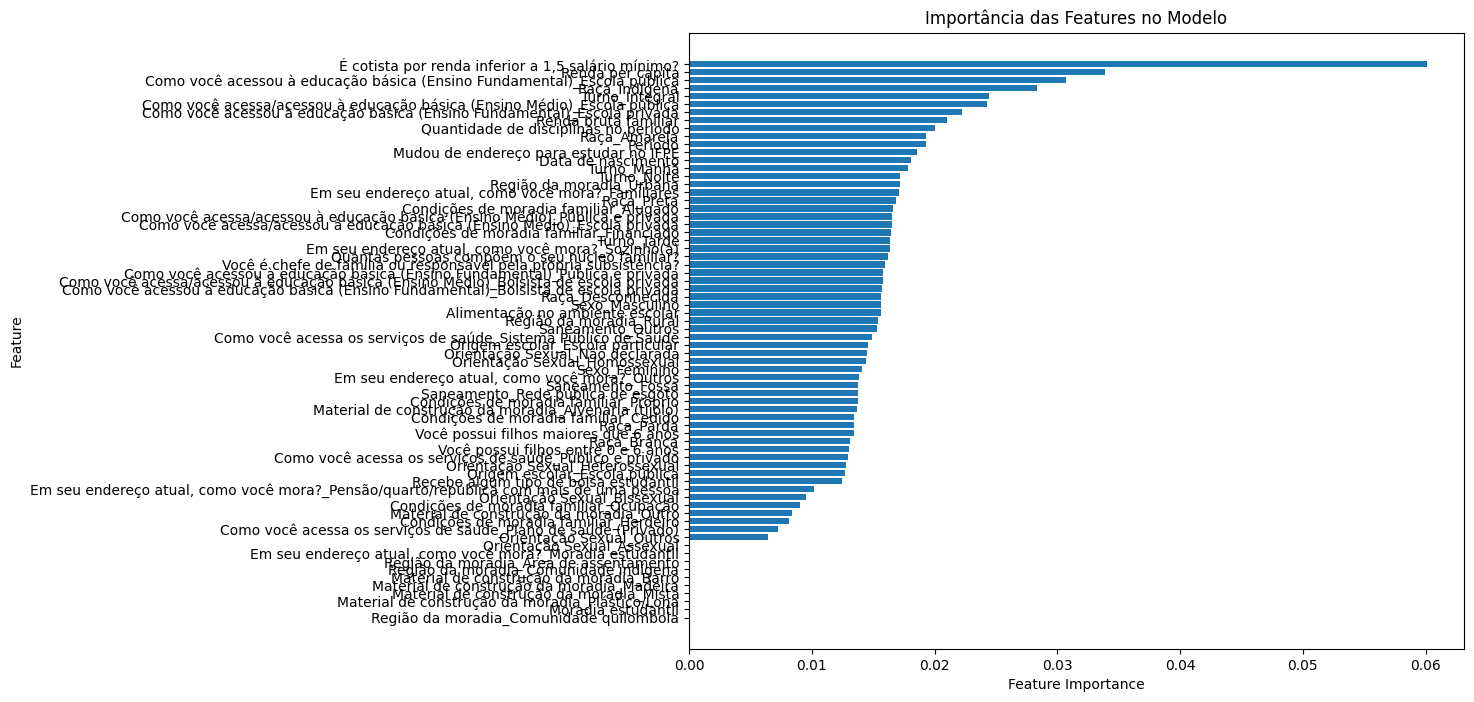

In [777]:
importance = model.feature_importances_

# Converter em DataFrame para facilitar a visualização
importance_df = pd.DataFrame({
    'Feature': X_train_unormalized.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo")
plt.gca().invert_yaxis()  # Inverter a ordem para que a feature mais importante apareça no topo
plt.show()

#### Teste

In [778]:
y_pred_proba = model.predict_proba(X_test)

In [779]:
y_pred = model.predict(X_test)

In [780]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8213166144200627
Precision: 0.7813736013920273
Recall: 0.8213166144200627


In [781]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8213166144200627,
 'tpr': 0.9769820971867008,
 'fpr': 0.8742857142857143,
 'precision': 0.8331515812431843,
 'f1-score': 0.8993525603296056}

## Modelos de aprendizagem profunda

Configurações opcionais:

In [782]:
#labels = tf.keras.utils.to_categorical(labels, num_classes=2)

In [783]:
#labels = to_categorical(labels, num_classes=2)

### Rede neural simples (MLP)

#### Treinamento

In [784]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Camada de entrada com 1536 neurônios
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [785]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [786]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [787]:
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/300


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7801 - loss: 0.5554 - val_accuracy: 0.8154 - val_loss: 0.4845
Epoch 2/300
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8140 - loss: 0.4900 - val_accuracy: 0.8165 - val_loss: 0.4629
Epoch 3/300
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.8117 - loss: 0.4805 - val_accuracy: 0.8163 - val_loss: 0.4557
Epoch 4/300
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8194 - loss: 0.4655 - val_accuracy: 0.8174 - val_loss: 0.4521
Epoch 5/300
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.8167 - loss: 0.4683 - val_accuracy: 0.8171 - val_loss: 0.4497
Epoch 6/300
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.8195 - loss: 0.4536 - val_accuracy: 0.8157 - val_loss: 0.4487
Epoch 7/300
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.8198 - loss: 0.4467 - val_accuracy: 0.8165 - val_loss: 0.4486
Epoch 8/300
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8221 - loss: 0.4453 - val_ac

#### Teste

In [788]:
y_pred_proba = model.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


In [789]:
y_pred = transform_prob_in_pred(y_pred_proba)

In [790]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8207941483803552
Precision: 0.785575240095132
Recall: 0.8207941483803552


In [791]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8207941483803552,
 'tpr': 0.9923273657289002,
 'fpr': 0.9457142857142857,
 'precision': 0.8242166755177908,
 'f1-score': 0.9004931824775168}

## Aprendizagem de máquina automática (AutoML)

### Tpot

In [804]:
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20)
tpot.fit(X_train, y_train)

Optimization Progress:  15%|█▌        | 18/120 [01:29<05:48,  3.42s/pipeline]

: 

In [ ]:
print(tpot.score(X_test, y_test))

# Ordenação do dataframe

Modelo escolhido: GBM

In [794]:
model = GradientBoostingClassifier(
    n_estimators= 50,
    learning_rate= 0.09,
    max_depth= 4,
    min_samples_split= 2,
    min_samples_leaf= 1,
    subsample= 0.5
    )#, random_state=RANDOM_SEED)

In [795]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.09, max_depth=4, n_estimators=50,
                           subsample=0.5)

In [796]:
y_pred_proba = model.predict_proba(df)

In [797]:
df['Nível de necessidade'] = y_pred_proba[:, 1]

In [798]:
df_result = df.sort_values(by='Nível de necessidade', ascending=False)

In [799]:
df_result.reset_index(drop=True, inplace=True)

In [800]:
df_result

,Alimentação no ambiente escolar,Como você acessa os serviços de saúde_Plano de saúde (Privado),Como você acessa os serviços de saúde_Público e privado,Como você acessa os serviços de saúde_Sistema Público de Saúde,Como você acessa/acessou à educação básica (Ensino Médio)_Bolsista de escola privada,Como você acessa/acessou à educação básica (Ensino Médio)_Escola privada,Como você acessa/acessou à educação básica (Ensino Médio)_Escola pública,Como você acessa/acessou à educação básica (Ensino Médio)_Pública e privada,Como você acessou à educação básica (Ensino Fundamental)_Bolsista de escola privada,Como você acessou à educação básica (Ensino Fundamental)_Escola privada,...,Sexo_Masculino,Turno_Integral,Turno_Manhã,Turno_Noite,Turno_Tarde,Você possui filhos entre 0 e 6 anos,Você possui filhos maiores que 6 anos,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?",Nível de necessidade
0,0.0,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,0,0,True,True,0.874545
1,20.0,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,0,0,False,True,0.871253
2,0.0,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,0,1,True,False,0.869692
3,0.0,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,1,0,True,True,0.868885
4,150.0,False,False,True,False,False,True,False,False,False,...,True,False,False,False,True,0,0,True,False,0.868580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19131,0.0,True,False,False,False,False,True,False,False,True,...,True,False,False,False,True,0,0,False,False,0.103997
19132,0.0,False,True,False,False,False,True,False,False,True,...,True,False,False,False,True,0,0,False,False,0.103997
19133,0.0,True,False,False,False,False,True,False,False,True,...,True,False,False,False,True,0,0,False,False,0.103997
19134,0.0,False,True,False,False,False,True,False,False,True,...,True,False,False,False,True,0,0,False,False,0.103243


In [801]:
df

,Alimentação no ambiente escolar,Como você acessa os serviços de saúde_Plano de saúde (Privado),Como você acessa os serviços de saúde_Público e privado,Como você acessa os serviços de saúde_Sistema Público de Saúde,Como você acessa/acessou à educação básica (Ensino Médio)_Bolsista de escola privada,Como você acessa/acessou à educação básica (Ensino Médio)_Escola privada,Como você acessa/acessou à educação básica (Ensino Médio)_Escola pública,Como você acessa/acessou à educação básica (Ensino Médio)_Pública e privada,Como você acessou à educação básica (Ensino Fundamental)_Bolsista de escola privada,Como você acessou à educação básica (Ensino Fundamental)_Escola privada,...,Sexo_Masculino,Turno_Integral,Turno_Manhã,Turno_Noite,Turno_Tarde,Você possui filhos entre 0 e 6 anos,Você possui filhos maiores que 6 anos,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?",Nível de necessidade
0,25.0,False,False,True,False,False,True,False,False,False,...,True,False,False,True,False,0,0,False,False,0.227121
1,0.0,False,False,True,False,False,True,False,False,False,...,True,False,False,True,False,0,0,True,True,0.152750
2,0.0,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,0,3,False,False,0.522880
3,70.0,False,False,True,False,False,True,False,False,False,...,True,False,False,True,False,0,0,False,False,0.211177
4,0.0,False,False,True,False,False,True,False,False,False,...,True,False,False,False,True,0,1,False,True,0.140544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19131,45.0,True,False,False,False,True,False,False,False,True,...,True,False,False,False,True,0,0,False,False,0.255939
19132,0.0,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,0,0,False,True,0.246558
19133,10.0,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,0,2,True,True,0.156897
19134,40.0,False,False,True,False,False,True,False,False,False,...,True,False,False,True,False,0,0,True,True,0.164516


In [802]:
dump(model, f'../models/GBM_{len(df.columns)}c_a{accuracy}.joblib')

['../models/GBM_71c_a0.8207941483803552.joblib']

In [803]:
dump(scaler, f'../models/scalers/std_scaler_GBM_{len(df.columns)}c_a{accuracy}.pkl')

['../models/scalers/std_scaler_GBM_71c_a0.8207941483803552.pkl']